In [362]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch

In [363]:
# Установка общего seed
SEED = 42

# Python random
random.seed(SEED)

# NumPy random
np.random.seed(SEED)

# PyTorch random
torch.manual_seed(SEED)

# Если используете GPU:
torch.cuda.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)  # Для всех доступных GPU

# Для детерминированности операций на CUDA (может замедлить обучение)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Ограничение многопоточности
os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'

# Для LightGBM
import lightgbm as lgb
lgb_params = {
    'random_state': SEED,
    'deterministic': True
}

# Для XGBoost
import xgboost as xgb
xgb_params = {
    'random_state': SEED,
    'seed': SEED
}

# Для CatBoost
from catboost import CatBoostRegressor
catboost_params = {
    'random_seed': SEED
}


In [364]:
def log(x,base):
  return np.log(x) / np.log(base)

In [ ]:
train = pd.read_csv(r'C:\Users\Sultan\Desktop\mipt_competition\data\train.csv')

In [366]:
train.head()

,index,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18
0,0,495.67,17.0,1,22,0,1,0.0,0.0,185.18,287.05,0.85,6.33,54.38,0.0,0.0,0.00,30.54,0.0,509.94
1,1,595.67,21.0,1,32,0,1,0.0,0.0,76.28,522.28,0.00,7.96,190.97,0.0,0.0,0.00,0.00,0.0,606.52
2,2,786.37,10.0,1,45,1,2,0.0,0.0,131.27,566.15,0.00,20.23,328.13,0.0,0.0,8.85,0.00,0.0,726.50
3,3,1142.63,10.0,1,41,0,2,0.0,0.0,307.49,926.55,0.00,8.08,351.38,0.0,0.0,0.00,5.05,0.0,1247.17
4,4,567.47,19.0,1,36,0,1,0.0,0.0,4.18,529.77,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,533.95


In [367]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   16000 non-null  int64  
 1   y       16000 non-null  float64
 2   x1      16000 non-null  float64
 3   x2      16000 non-null  int64  
 4   x3      16000 non-null  int64  
 5   x4      16000 non-null  int64  
 6   x5      16000 non-null  int64  
 7   x6      16000 non-null  float64
 8   x7      16000 non-null  float64
 9   x8      16000 non-null  float64
 10  x9      16000 non-null  float64
 11  x10     16000 non-null  float64
 12  x11     16000 non-null  float64
 13  x12     16000 non-null  float64
 14  x13     16000 non-null  float64
 15  x14     16000 non-null  float64
 16  x15     16000 non-null  float64
 17  x16     16000 non-null  float64
 18  x17     16000 non-null  float64
 19  x18     16000 non-null  float64
dtypes: float64(15), int64(5)
memory usage: 2.4 MB


In [368]:
from sklearn.cluster import DBSCAN

# Создаем модель
dbscan = DBSCAN(eps=550, min_samples=2)

# Обучаем модель
dbscan.fit(train)

# Предсказание выбросов
train['cluster'] = dbscan.labels_
train = train[train['cluster'] != -1]

In [369]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15734 entries, 0 to 15999
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    15734 non-null  int64  
 1   y        15734 non-null  float64
 2   x1       15734 non-null  float64
 3   x2       15734 non-null  int64  
 4   x3       15734 non-null  int64  
 5   x4       15734 non-null  int64  
 6   x5       15734 non-null  int64  
 7   x6       15734 non-null  float64
 8   x7       15734 non-null  float64
 9   x8       15734 non-null  float64
 10  x9       15734 non-null  float64
 11  x10      15734 non-null  float64
 12  x11      15734 non-null  float64
 13  x12      15734 non-null  float64
 14  x13      15734 non-null  float64
 15  x14      15734 non-null  float64
 16  x15      15734 non-null  float64
 17  x16      15734 non-null  float64
 18  x17      15734 non-null  float64
 19  x18      15734 non-null  float64
 20  cluster  15734 non-null  int64  
dtypes: float64(15), i

In [370]:
targets = ['y']

features = train.drop(columns=['y','index','cluster']).columns

In [371]:
from sklearn.preprocessing import MinMaxScaler
# Инициализация StandardScaler
scaler = MinMaxScaler()

# Стандартизация только числовых признаков
train[features] = scaler.fit_transform(train[features])


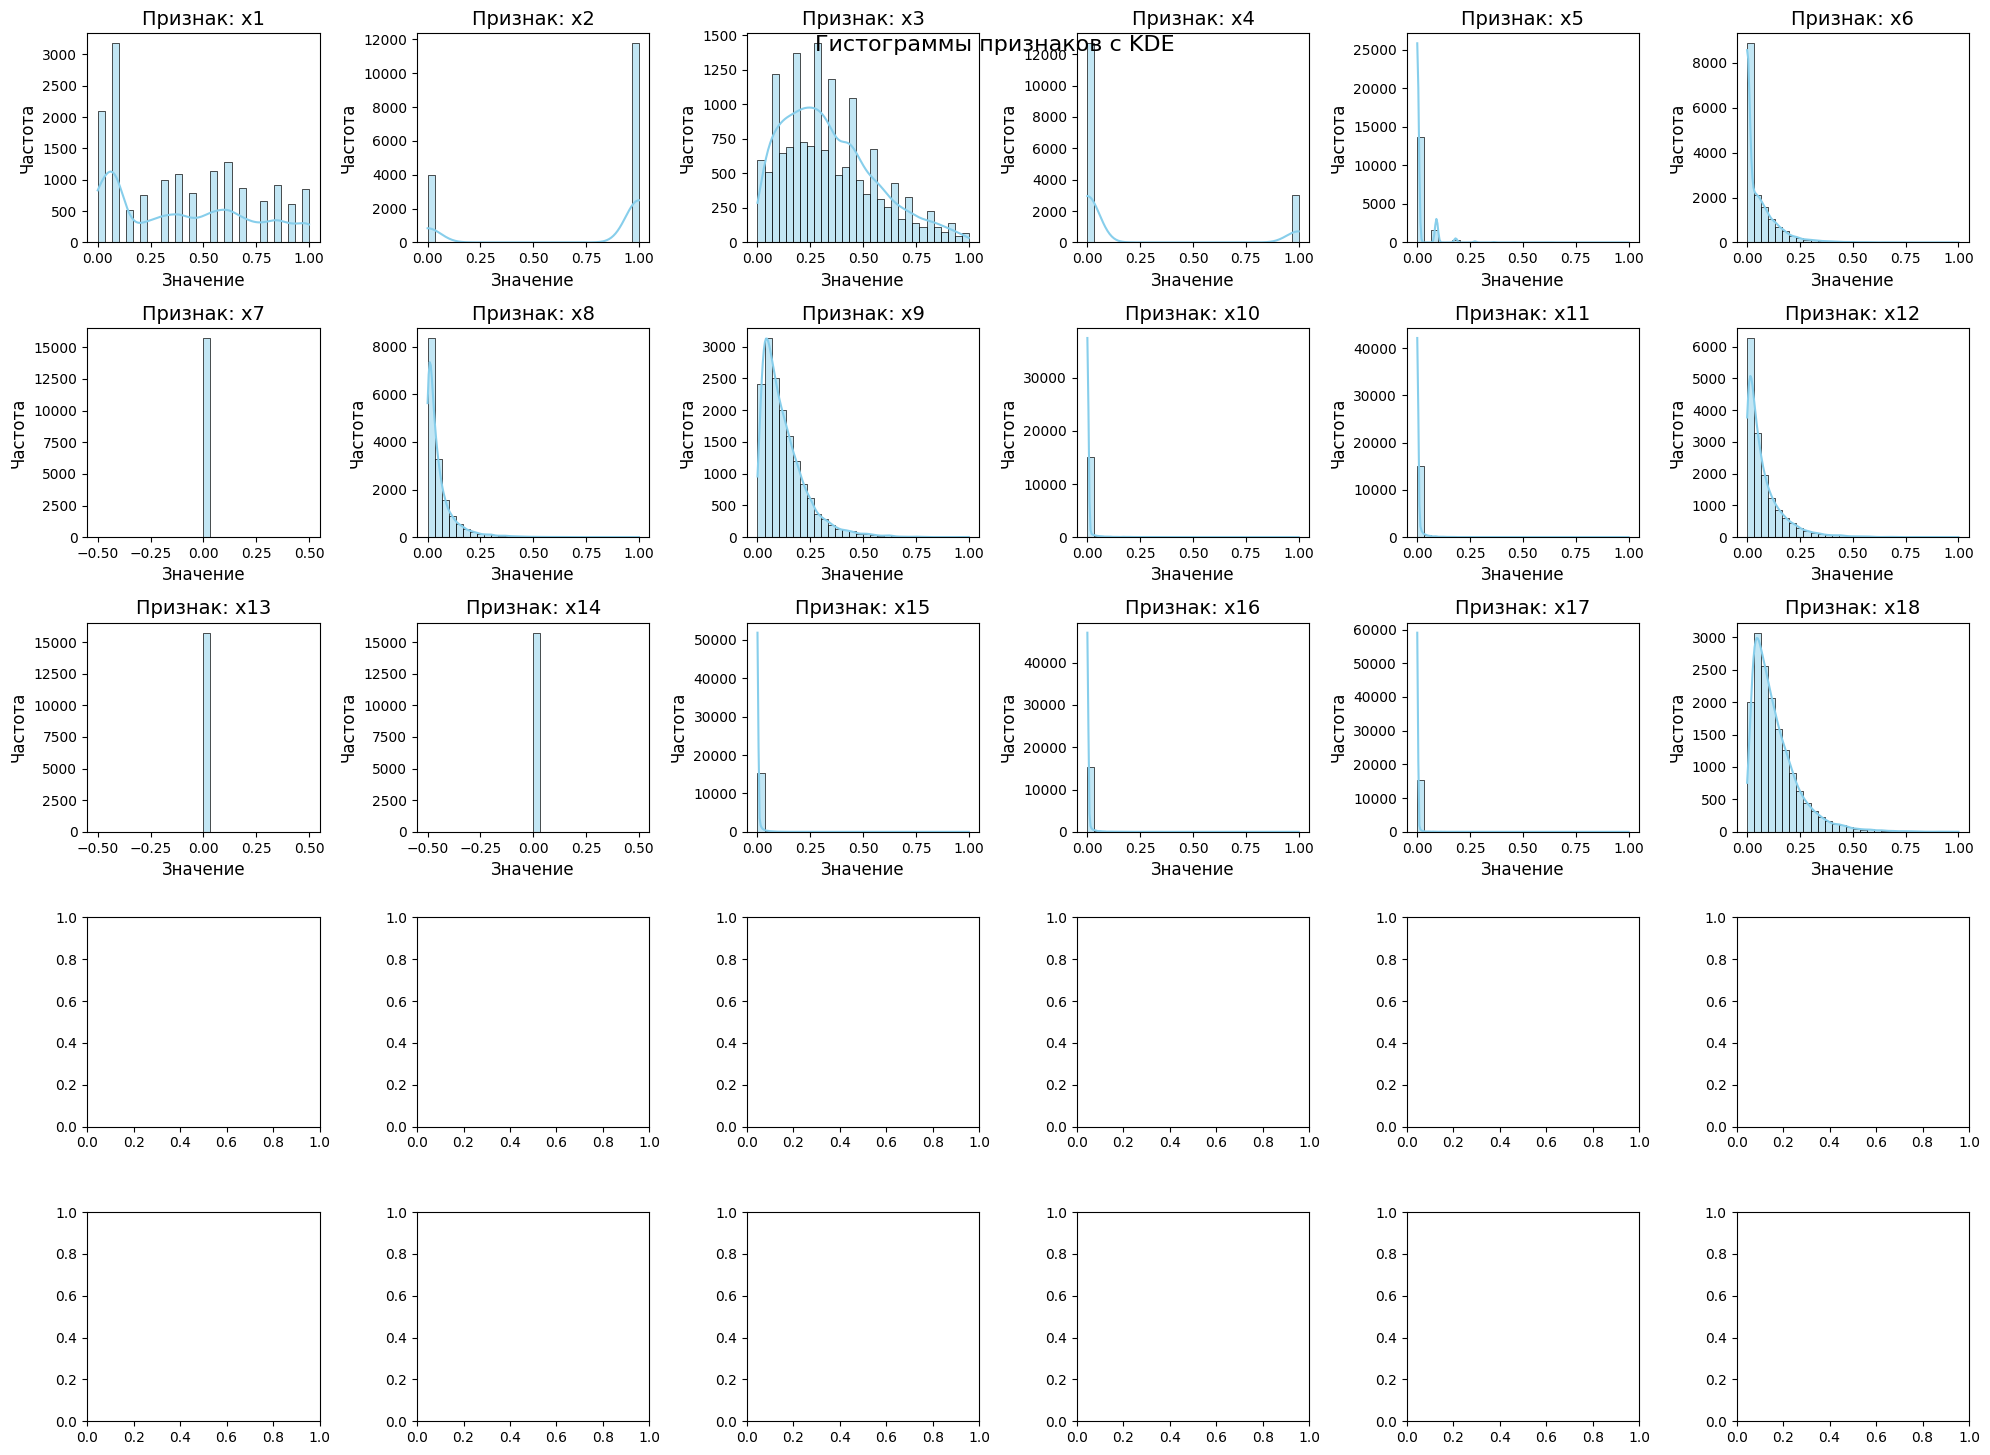

In [372]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Создаем фигуру и подграфики
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(20, 15))
axes = axes.flatten()

# Рисуем гистограммы для каждого признака
for i, column in enumerate(features):
    sns.histplot(train[column], kde=True, ax=axes[i], bins=30, color='skyblue')
    axes[i].set_title(f'Признак: {column}', fontsize=14)
    axes[i].set_xlabel('Значение', fontsize=12)
    axes[i].set_ylabel('Частота', fontsize=12)
    axes[i].tick_params(axis='both', labelsize=10)

# Убираем лишние пустые оси
for i in range(len(features), 18):
    fig.delaxes(axes[i])

# Добавляем заголовок для всей фигуры
fig.suptitle('Гистограммы признаков с KDE', fontsize=16, y=0.95)

# Настройка макета
plt.tight_layout()
plt.show()

In [373]:
def add_features(dataset, features):
    # Вычисляем новые признаки
    dataset.replace({0: 1e-20}, inplace=True)
    dataset['mean_features'] = 0.1 * dataset[features].mean(axis=1)
    dataset['std_features'] = dataset[features].std(axis=1)
    dataset['max_features'] = dataset[features].max(axis=1)
    dataset['min_features'] = dataset[features].min(axis=1)
    dataset['median_features'] = 0.1 * dataset[features].median(axis=1)
    dataset['range_features'] = dataset['max_features'] - dataset['min_features']
    dataset['variance_features'] = dataset[features].var(axis=1)
    dataset['skewness_features'] = dataset[features].skew(axis=1)
    dataset['kurtosis_features'] = dataset[features].kurtosis(axis=1)
    dataset['sum_features'] = dataset[features].sum(axis=1)
    dataset['ms_features'] = ((dataset[features] ** 2).sum(axis=1)) / len(features)
    dataset['sm_features'] = ((dataset[features] ** 2).sum(axis=1)) ** 0.5
    dataset['product_features'] = dataset[features].product(axis=1)
    dataset['x18**2 + x9**2'] = dataset['x18']**2 + dataset['x9'] ** 2
    dataset['x18_log'] = np.log(dataset['x18']) / np.log(1.2)
    dataset['x18_sqrt'] = np.sqrt(dataset['x18'])
    dataset['x12_plus_x9'] = dataset['x12'] + dataset['x9']
    dataset['x18_squared_plus_x9_squared'] = dataset['x18']**2 + dataset['x9'] ** 2
    dataset['ss'] = dataset[['x5', 'x3']].sum(axis=1)
    dataset['logpred'] = np.log(dataset['x12_plus_x9']) / np.log(1.2)
    dataset['x18_sqrt_plus_ss'] = dataset['x18_sqrt'] + dataset['ss']
    dataset['logd'] = np.log(dataset['x18_sqrt_plus_ss']) / np.log(1.2)
    dataset['x12_plus_x9_plus_x8_half'] = dataset['x12'] + dataset['x9'] + dataset['x8'] * 0.5
    dataset['x5_squared'] = dataset['x5'] ** 2
    dataset['x5_plus_x3'] = dataset['x5'] + dataset['x3']
    dataset['kill'] = dataset['x5_plus_x3'] + dataset['x18_sqrt']
    dataset['kk'] = np.log(dataset['kill']) / np.log(1.2)
    dataset['x18_log_var'] = np.log(dataset['x18']) / np.log(1.2) - np.var(dataset['x18']) / np.log(1.2)
    mean_values = dataset[features].mean(axis=1)
    dataset['count_above_mean'] = dataset[features].apply(
        lambda row: (row > mean_values[row.name]).sum(), axis=1
    )
    return dataset

def cleaning(df,mode):
    if mode=='train':
        features = df.drop(columns=['index','y']).columns
    else:
        features = df.drop(columns=['index']).columns
    # Список столбцов для удаления
    columns_to_drop = ['x7', 'x13', 'x14','x15','x16','x17','x10','x11']
    features = list(filter(lambda x: x not in columns_to_drop, features))
    df.drop(columns=columns_to_drop,inplace=True)
    df = add_features(df, features)
    
    return df

In [374]:
train = cleaning(train,'train')

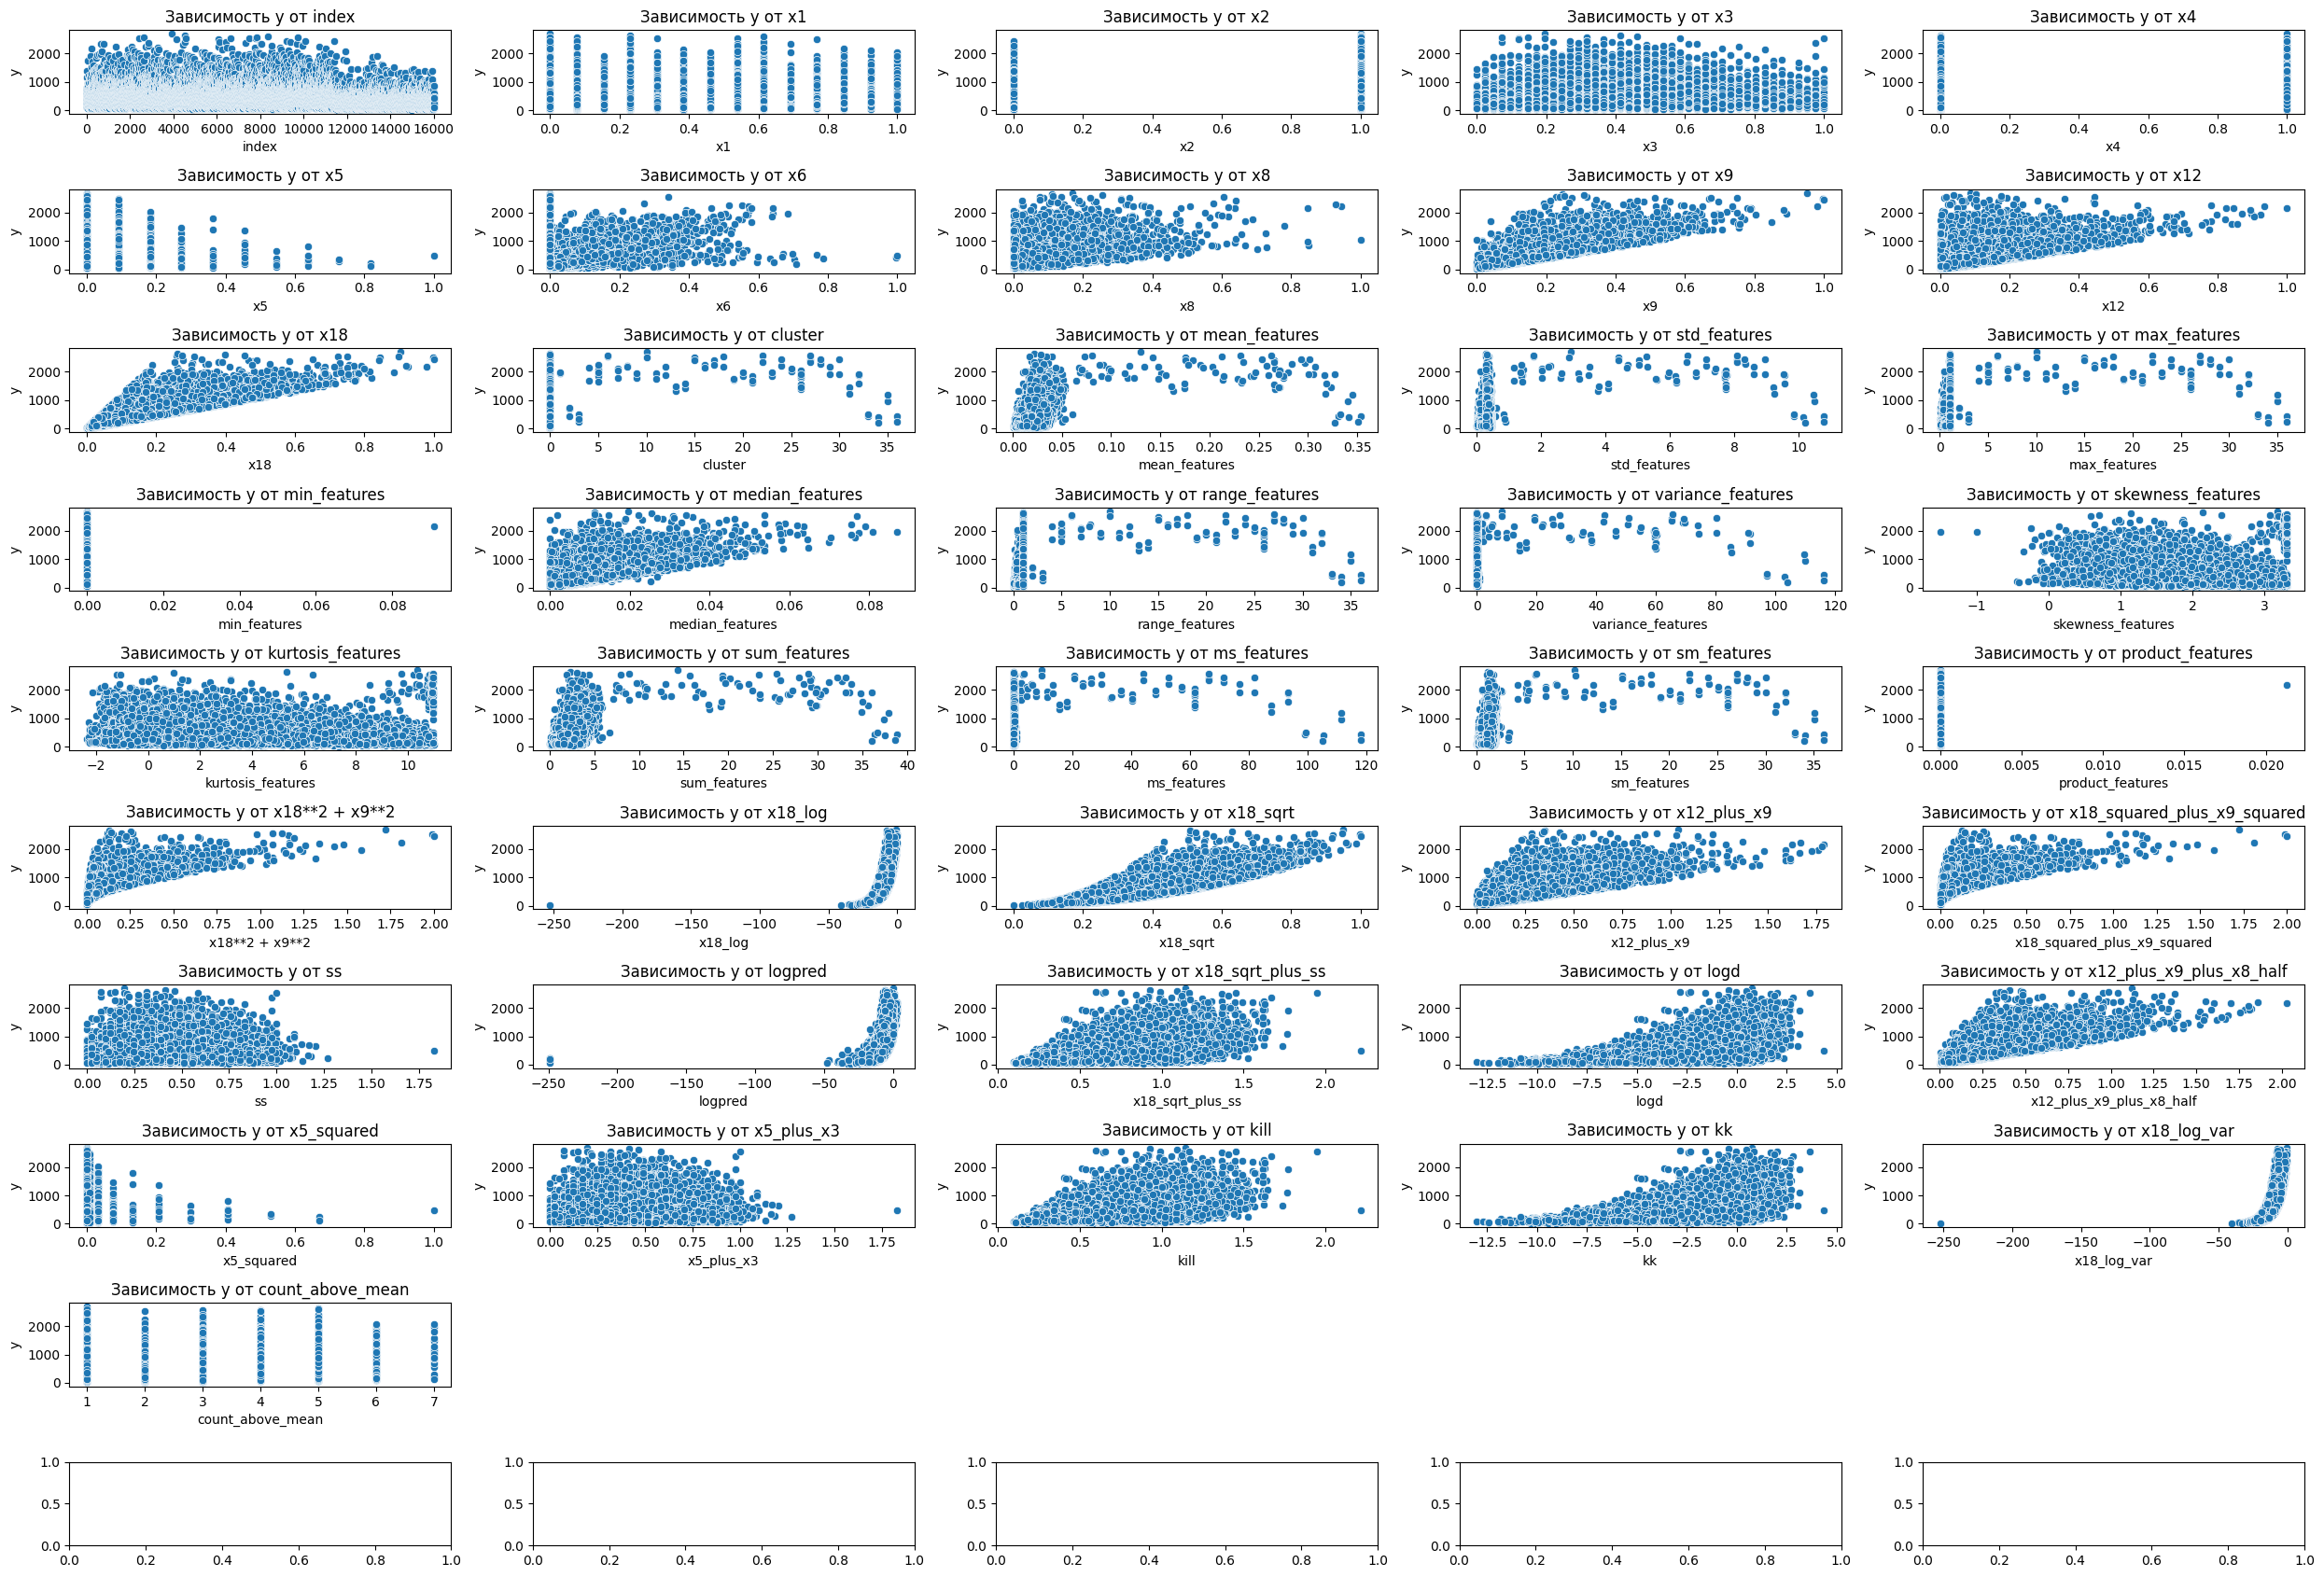

In [375]:

features = [col for col in train.columns if col != 'y']
fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(25, 17))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.scatterplot(data=train, x=feature, y='y', ax=axes[i])
    axes[i].set_title(f'Зависимость y от {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('y')

# Убираем лишние пустые оси
for i in range(len(features), 45):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [ ]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import shap
import numpy as np
import pandas as pd

# Исходные данные
features = train.drop(columns=['y','index']).columns
X = train[features]
y = log(train['y'],1.2)

# Разделение на тренировочную и валидационную выборки
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Создание Pool для тренировки и валидации
train_pool = Pool(X_train, label=y_train)
val_pool = Pool(X_val, label=y_val)

# Модель для регрессии
model = CatBoostRegressor(random_seed=SEED)

# Функция для рекурсивного отбора признаков с SHAP
def recursive_feature_elimination_shap(train_pool, val_pool, model, threshold=0.0001, max_stopping_rounds=3, output_file=r"C:\Users\Sultan\Desktop\mipt_competition\tmp_data\selected_features.csv"):
    # Получаем имена признаков из train_pool
    selected_features = train_pool.get_feature_names()
    best_score = float('inf')  # Для регрессии лучше минимизировать ошибку
    stopping_rounds = 0

    while len(selected_features) > 1:
        # Тренировка модели
        model.fit(train_pool, eval_set=val_pool, verbose=0)
        preds = model.predict(val_pool)
        score = mean_absolute_percentage_error(y_val, preds)  # Для регрессии используем RMSE
        
        # Проверка ухудшения качества
        if score > best_score + threshold:
            stopping_rounds += 1
            if stopping_rounds >= max_stopping_rounds:
                print("Остановка: качество ухудшается.")
                break
        else:
            stopping_rounds = 0
            best_score = score

        # Вычисление SHAP значений
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_train[selected_features])  # Берем значения для всех классов
        shap_mean = np.abs(shap_values).mean(axis=0)

        # Наименее важный признак
        least_important_idx = np.argmin(shap_mean)
        least_important_feature = selected_features[least_important_idx]
        print(f"Удаляем признак: {least_important_feature}, MAPE: {score:.4f}")

        # Удаляем признак из списка
        selected_features = [f for i, f in enumerate(selected_features) if i != least_important_idx]
        
        # Обновляем train_pool и val_pool с новыми признаками
        train_pool = Pool(X_train[selected_features], label=y_train)
        val_pool = Pool(X_val[selected_features], label=y_val)

    # Сохраняем выбранные признаки в файл
    pd.DataFrame(selected_features, columns=['Feature']).to_csv(output_file, index=False)
    print(f"\nВыбранные признаки сохранены в файл: {output_file}")

    return selected_features, best_score

FIND_MODE = False

if FIND_MODE:
    # Запуск рекурсивного отбора признаков
    selected_features, best_score = recursive_feature_elimination_shap(train_pool, val_pool, model)
    print("\nОставшиеся признаки:", selected_features)
    print("Лучшее качество на валидации (MAPE):", best_score)


In [ ]:
selected_features_df = pd.read_csv(r"C:\Users\Sultan\Desktop\mipt_competition\tmp_data\selected_features.csv")
selected_features = selected_features_df['Feature'].tolist()

In [378]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

# Ваши данные
X = train[selected_features]
y = train['y']

# Разделение на тренировочную и тестовую выборки
MODE = 'test'

if MODE == 'validation':
    
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.2,
                                                        random_state=SEED)
    y_train_catboost = log(y_train,1.2)
    y_test_catboost = log(y_test,1.2)
    y_train_lgbm = y_train
    y_test_lgbm = y_test
elif MODE == 'test':
    X_train = X
    y_train_catboost = log(y,1.2)
    y_train_lgbm = y
    X_test = pd.read_csv('test.csv')
    features = X_test.drop(columns=['index']).columns
    X_test[features] = scaler.transform(X_test[features])
    X_test = cleaning(X_test,'test')
    X_test = X_test[selected_features]

# Инициализация StandardScaler
scaler = StandardScaler()

# Стандартизация только числовых признаков
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_final = pd.DataFrame(X_train_scaled, columns=selected_features, index=X_train.index)
X_test_final = pd.DataFrame(X_test_scaled, columns=selected_features, index=X_test.index)



In [ ]:
import optuna
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

def objective_CatBoost(trial, X, y, cat_features, n_splits=5):
    """
    Оптимизация гиперпараметров CatBoostRegressor с использованием Optuna.
    
    Parameters:
        trial: optuna.Trial
            Объект для оптимизации.
        X: pd.DataFrame
            Признаки.
        y: pd.Series
            Целевые значения.
        cat_features: list
            Список категориальных признаков.
        n_splits: int
            Количество фолдов для кросс-валидации.
            
    Returns:
        float: Средняя метрика (например, MAPE) по фолдам.
    """
    # Определение гиперпараметров
    params = {
        'iterations': trial.suggest_int('iterations', 100, 3000),
        'depth': trial.suggest_int('depth', 3, 7),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-5, 10, log=True),
        'random_strength': trial.suggest_float('random_strength', 1e-3, 10, log=True),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'border_count': trial.suggest_int('border_count', 32, 500),
        'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations', 1, 10),
        'grow_policy': trial.suggest_categorical('grow_policy', ['SymmetricTree', 'Depthwise']),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 50),
        "loss_function": 'MAPE',  # Используем квадратичную ошибку для обучения
        "eval_metric": 'MAPE',
        'random_state': SEED,
        'task_type': 'CPU',
        'boosting_type': 'Plain',
        # 'gpu_cat_features_storage': 'GpuRam',
        'cat_features': cat_features,
    }

    # KFold кросс-валидация
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=SEED)
    fold_mape = []

    for train_idx, valid_idx in kf.split(X, y):
        X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
        y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

        # Создание Pool для тренировки и валидации
        train_pool = Pool(X_train, y_train, cat_features=cat_features)
        valid_pool = Pool(X_valid, y_valid, cat_features=cat_features)

        # Инициализация и обучение модели
        model = CatBoostRegressor(**params)
        model.fit(
            train_pool,
            eval_set=valid_pool,
            early_stopping_rounds=25,
            verbose=False
        )

        # Предсказания и оценка MAPE
        y_pred = model.predict(X_valid)
        mape = mean_absolute_percentage_error(y_valid, y_pred)
        fold_mape.append(mape)

    # Средний MAPE по фолдам
    return np.mean(fold_mape)

def run_study_CatBoost(X, y, cat_features, n_trials=50, n_splits=5):
    """
    Запуск Optuna-исследования для оптимизации гиперпараметров CatBoostRegressor.
    
    Parameters:
        X: pd.DataFrame
            Признаки.
        y: pd.Series
            Целевые значения.
        cat_features: list
            Список категориальных признаков.
        n_trials: int
            Количество испытаний в Optuna.
        n_splits: int
            Количество фолдов для кросс-валидации.
            
    Returns:
        optuna.Study: Результат исследования.
    """
    study = optuna.create_study(study_name="CatBoost Optimization",
                                direction="minimize",  # Минимизируем MAPE
                                storage=r"sqlite:///C:\Users\Sultan\Desktop\mipt_competition\tmp_data\catboost_mipt.db",  # Для сохранения прогресса
                                load_if_exists=True)
    study.optimize(
        lambda trial: objective_CatBoost(trial, X, y, cat_features, n_splits=n_splits),
        n_trials=n_trials
    )
    return study


In [ ]:
study_CatBoost = run_study_CatBoost(X_train_final, y_train_catboost, cat_features=[], n_trials=10, n_splits=5)

valid_trials = [trial for trial in study_CatBoost.trials if trial.value is not None]
best_trials_CatBoost = sorted(valid_trials, key=lambda trial: trial.value)[:5]

In [ ]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
from tqdm import tqdm

def train_and_select_best_cbm(X, y, cat_features, params_list, n_splits=5, SEED=42):
    """
    Обучение моделей с различными гиперпараметрами и выбор модели с наилучшим результатом по метрике MAPE.
    
    Parameters:
        X: pd.DataFrame
            Признаки.
        y: pd.Series
            Целевые значения.
        cat_features: list
            Список категориальных признаков.
        params_list: list
            Список словарей с гиперпараметрами для обучения.
        n_splits: int
            Количество фолдов для кросс-валидации.
        SEED: int
            Сид для случайного генератора.
            
    Returns:
        best_model: CatBoostRegressor
            Лучшая модель на основе минимального MAPE.
        best_mape: float
            Лучший MAPE по фолдам.
        models: list
            Список обученных моделей.
    """
    # Инициализация переменных для хранения лучших результатов
    best_model = None
    best_mape = float('inf')  # Начинаем с бесконечности, чтобы минимизировать
    # Список для всех моделей
    models = []
    
    # Фиксированные параметры
    fix = {
        'loss_function': 'MAPE',
        'eval_metric': 'MAPE',
        'random_state': SEED,
        'task_type': 'CPU',
        'boosting_type': 'Plain',
        # 'gpu_cat_features_storage': 'GpuRam',
        'cat_features': cat_features,
    }
    
    # KFold кросс-валидация
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=SEED+1)
    
    # Перебор всех параметров
    for trial in tqdm(params_list):
        params = trial.params
        params.update(fix)
        fold_mape = []
        
        for train_idx, valid_idx in kf.split(X, y):
            X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
            y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]
            
            # Создание Pool для тренировки и валидации
            train_pool = Pool(X_train, y_train, cat_features=cat_features)
            valid_pool = Pool(X_valid, y_valid, cat_features=cat_features)
            
            # Инициализация модели
            model = CatBoostRegressor(**params)
            
            # Обучение модели
            model.fit(
                train_pool,
                eval_set=valid_pool,
                early_stopping_rounds=25,
                verbose=False
            )
            
            # Предсказания и оценка MAPE
            y_pred = model.predict(X_valid)
            mape = mean_absolute_percentage_error(y_valid, y_pred)
            fold_mape.append(mape)
        
        # Средний MAPE по фолдам
        avg_mape = np.mean(fold_mape)
        
        # Сохраняем модель, если её MAPE меньше лучшего
        if avg_mape < best_mape:
            best_mape = avg_mape
            best_model = model
        
        # Добавляем текущую модель в список
        models.append(model)
    
    return best_model, best_mape, models


In [ ]:
best_model_catboost, best_mape, models = train_and_select_best_cbm(X_train_final, y_train_catboost, 
                                                                     cat_features=[], 
                                                                     params_list=best_trials_CatBoost, 
                                                                     n_splits=5)

# Сохранение лучшей модели
best_model_catboost.save_model(r'C:\Users\Sultan\Desktop\mipt_competition\models\catboost_model_mipt.cbm', format="cbm")
print("Лучшая модель CatBoost сохранена")
print("Лучший MAPE:", best_mape)

100%|██████████| 5/5 [00:37<00:00,  7.51s/it]

Лучшая модель CatBoost сохранена
Лучший MAPE: 0.04977360081201985


In [ ]:
import optuna
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
# Функция для расчета градиента и гессиана MAPE
def mape_loss(y_pred, dtrain):
    y_true = dtrain.get_label()
    grad = (y_pred - y_true) / np.maximum(1e-5, np.abs(y_true))
    hess = 1 / np.maximum(1e-5, np.abs(y_true))
    return grad, hess
# Функция для расчета MAPE метрики
def mape_metric(y_pred, dtrain):
    y_true = dtrain.get_label()
    mape = np.mean(np.abs((y_true - y_pred) / np.maximum(1e-5, np.abs(y_true)))) * 100
    return 'MAPE', mape
def objective_XGBoost(trial, X, y, n_splits=5):
    """
    Оптимизация гиперпараметров XGBoost с использованием Optuna.
    
    Parameters:
        trial: optuna.Trial
            Объект для оптимизации.
        X: pd.DataFrame
            Признаки.
        y: pd.Series
            Целевые значения.
        n_splits: int
            Количество фолдов для кросс-валидации.
            
    Returns:
        float: Средняя метрика MAPE по фолдам.
    """
    # Определение гиперпараметров
    params = {
        'objective': 'reg:pseudohubererror',  # Цель задачи: регрессия
        "eval_metric": 'mape',
        'booster': 'gblinear',
        # 'max_depth': trial.suggest_int('max_depth', 3, 7),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        # 'subsample': trial.suggest_float('subsample', 0.3, 1.0),
        # 'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        # 'gamma': trial.suggest_float('gamma', 0.0, 5.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-5, 10, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-5, 10, log=True),
    }
    
    # KFold кросс-валидация
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=SEED)
    fold_mape = []
    
    for train_idx, valid_idx in kf.split(X, y):
        X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
        y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]
        
        # Для XGBoost данные нужно передавать в формате DMatrix
        train_data = xgb.DMatrix(X_train, label=y_train)
        valid_data = xgb.DMatrix(X_valid, label=y_valid)
        
        # Получаем количество деревьев из trial
        num_boost_round = trial.suggest_int('num_boost_round', 100, 2000)
        
        # Обучение модели
        model = xgb.train(
            params,
            train_data,
            evals=[(valid_data, 'eval')],
            custom_metric=mape_metric,
            obj=mape_loss,
            early_stopping_rounds=25,
            num_boost_round=num_boost_round,
            verbose_eval=False
        )
        
        # Предсказания и оценка MAPE
        y_pred = model.predict(valid_data)
        mape = mean_absolute_percentage_error(y_valid, y_pred)
        fold_mape.append(mape)
    
    # Средний MAPE по фолдам
    return np.mean(fold_mape)
def run_study_XGBoost(X, y, n_trials=50, n_splits=5):
    """
    Запуск Optuna-исследования для оптимизации гиперпараметров XGBoost.
    
    Parameters:
        X: pd.DataFrame
            Признаки.
        y: pd.Series
            Целевые значения.
        n_trials: int
            Количество испытаний в Optuna.
        n_splits: int
            Количество фолдов для кросс-валидации.
            
    Returns:
        optuna.Study: Результат исследования.
    """
    study = optuna.create_study(study_name="XGBoost Optimization",
                                direction="minimize",  # Минимизируем MAPE
                                storage=r"sqlite:///C:\Users\Sultan\Desktop\mipt_competition\tmp_data\xgboost_optuna_mipt.db",  # Для сохранения прогресса
                                load_if_exists=True)
    study.optimize(
        lambda trial: objective_XGBoost(trial, X, y, n_splits=n_splits),
        n_trials=n_trials
    )
    return study

In [ ]:
study_XGB = run_study_XGBoost(X_train_final, y_train_lgbm, n_trials=100, n_splits=5)

valid_trials = [trial for trial in study_XGB.trials if trial.value is not None]
best_trials_XGB = sorted(valid_trials, key=lambda trial: trial.value)[:5]

[I 2024-12-08 22:55:31,108] A new study created in RDB with name: XGBoost Optimization
[I 2024-12-08 22:55:33,002] Trial 0 finished with value: 0.5098773144822403 and parameters: {'learning_rate': 0.13105089269279727, 'reg_alpha': 1.7259782909424006e-05, 'reg_lambda': 0.09823727039307288, 'num_boost_round': 1457}. Best is trial 0 with value: 0.5098773144822403.
[I 2024-12-08 22:55:33,558] Trial 1 finished with value: 0.280085511196326 and parameters: {'learning_rate': 0.11943859380057928, 'reg_alpha': 1.711477851999384e-05, 'reg_lambda': 4.6600846254038214e-05, 'num_boost_round': 355}. Best is trial 1 with value: 0.280085511196326.
[I 2024-12-08 22:55:34,264] Trial 2 finished with value: 0.4424483505817539 and parameters: {'learning_rate': 0.08036838069786564, 'reg_alpha': 0.04382082102978418, 'reg_lambda': 0.031109976144252316, 'num_boost_round': 120}. Best is trial 1 with value: 0.280085511196326.
[I 2024-12-08 22:55:35,000] Trial 3 finished with value: 0.5801229994568182 and paramet

In [ ]:
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
from tqdm import tqdm

def train_and_select_best_xgb(X, y, params_list, n_splits=5, SEED=42):
    """
    Обучение моделей с различными гиперпараметрами и выбор модели с наилучшим результатом по метрике MAPE.
    
    Parameters:
        X: pd.DataFrame
            Признаки.
        y: pd.Series
            Целевые значения.
        params_list: list
            Список словарей с гиперпараметрами для обучения.
        n_splits: int
            Количество фолдов для кросс-валидации.
        SEED: int
            Сид для случайного генератора.
            
    Returns:
        best_model: xgb.Booster
            Лучшая модель на основе минимального MAPE.
        best_mape: float
            Лучший MAPE по фолдам.
        models: list
            Список обученных моделей.
    """
    # Инициализация переменных для хранения лучших результатов
    best_model = None
    best_mape = float('inf')  # Начинаем с бесконечности, чтобы минимизировать
    
    # Список для всех моделей
    models = []
    fix = {
        'objective': 'reg:pseudohubererror',
        "eval_metric": 'mape',
        'booster': 'gblinear',
    }
    
    # KFold кросс-валидация
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=SEED+1)
    
    # Перебор всех параметров
    for trial in tqdm(params_list):
        params = trial.params
        params.update(fix)
        num_boost_round = params.pop('num_boost_round', 1000)
        fold_mape = []
        
        for train_idx, valid_idx in kf.split(X, y):
            X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
            y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]
            # Преобразование данных в формат DMatrix для XGBoost
            train_data = xgb.DMatrix(X_train, label=y_train)
            valid_data = xgb.DMatrix(X_valid, label=y_valid)
            
            # Инициализация модели
            model = xgb.train(
                params, 
                train_data,
                evals=[(valid_data, 'eval')],
                custom_metric=mape_metric,
                obj=mape_loss,
                num_boost_round=num_boost_round,
                early_stopping_rounds=25,
                verbose_eval=False,
            )
            
            # Предсказания и оценка MAPE
            y_pred = model.predict(valid_data)
            mape = mean_absolute_percentage_error(y_valid, y_pred)
            fold_mape.append(mape)
        
        # Средний MAPE по фолдам
        avg_mape = np.mean(fold_mape)
        
        # Сохраняем модель, если её MAPE меньше лучшего
        if avg_mape < best_mape:
            best_mape = avg_mape
            best_model = model
        
        # Добавляем текущую модель в список
        models.append(model)
    
    return best_model, best_mape, models

In [ ]:
# Обучение и выбор лучшей модели с использованием XGBoost
best_model_xgb, best_mape, models = train_and_select_best_xgb(
    X_train_final, y_train_lgbm, 
    params_list=best_trials_XGB, 
    n_splits=5
)

# Сохранение лучшей модели XGBoost
best_model_xgb.save_model(r'C:\Users\Sultan\Desktop\mipt_competition\models\xgboost_model_mipt.model')
print("Лучшая модель XGBoost сохранена")
print("Лучший MAPE:", best_mape)

100%|██████████| 5/5 [00:14<00:00,  2.91s/it]

Лучшая модель XGBoost сохранена
Лучший MAPE: 0.2725205745556846



c:\Users\Sultan\anaconda3\envs\webui\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:58:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


In [ ]:
import optuna
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

def mape_loss(y_pred, data):
    y_true = data.get_label()
    grad = (y_pred - y_true) / np.maximum(1e-5, np.abs(y_true))
    hess = 1 / np.maximum(1e-5, np.abs(y_true))
    return grad, hess

def mape_metric(y_pred, data):
    y_true = data.get_label()
    mape = np.mean(np.abs((y_true - y_pred) / np.maximum(1e-5, np.abs(y_true))))
    return 'mape', mape, False

def objective_LightGBM(trial, X, y, n_splits=5, SEED=SEED):
    """
    Оптимизация гиперпараметров LightGBM с использованием Optuna.
    
    Parameters:
        trial: optuna.Trial
            Объект для оптимизации.
        X: pd.DataFrame
            Признаки.
        y: pd.Series
            Целевые значения.
        n_splits: int
            Количество фолдов для кросс-валидации.
        SEED: int
            Сид для случайного генератора.
            
    Returns:
        float: Средняя метрика MAPE по фолдам.
    """
    # Определение гиперпараметров
    params = {
        'objective': mape_loss,
        'metric': None,
        'verbose': -1,
        'random_state': SEED,
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),  # Уменьшение num_leaves
        'max_depth': trial.suggest_int('max_depth', 3, 10),  # Уменьшение max_depth
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),  # Уменьшение learning_rate
        'feature_fraction': trial.suggest_float('feature_fraction', 0.6, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.6, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-5, 10, log=True),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-5, 10, log=True),
        'min_child_samples': trial.suggest_int('min_child_samples', 20, 100),  # Добавлено для борьбы с переобучением
        'max_bin': trial.suggest_int('max_bin', 100, 255),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-5, 1e-2, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-5, 1e-2, log=True),
        
    }

    # KFold кросс-валидация
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=SEED)
    fold_mape = []
    
    for train_idx, valid_idx in kf.split(X, y):
        X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
        y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]
        
        # LightGBM поддерживает DataFrame напрямую
        train_data = lgb.Dataset(X_train, label=y_train)
        valid_data = lgb.Dataset(X_valid, label=y_valid, reference=train_data)
        
        # Получаем количество итераций из trial
        num_boost_round = trial.suggest_int('num_boost_round', 500, 3000)
        
        # Обучение модели
        model = lgb.train(
            params,
            train_data,
            feval = mape_metric,
            num_boost_round=num_boost_round,
            valid_sets=[valid_data],
            callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=0)]
        )
        
        # Предсказания и оценка MAPE
        y_pred = model.predict(X_valid, num_iteration=model.best_iteration)
        mape = mean_absolute_percentage_error(y_valid, y_pred)
        fold_mape.append(mape)
    
    # Средний MAPE по фолдам
    return np.mean(fold_mape)

def run_study_LightGBM(X, y, n_trials=10, n_splits=5, SEED=42):
    """
    Запуск Optuna-исследования для оптимизации гиперпараметров LightGBM.
    
    Parameters:
        X: pd.DataFrame
            Признаки.
        y: pd.Series
            Целевые значения.
        n_trials: int
            Количество испытаний в Optuna.
        n_splits: int
            Количество фолдов для кросс-валидации.
        SEED: int
            Сид для случайного генератора.
            
    Returns:
        optuna.Study: Результат исследования.
    """
    study = optuna.create_study(study_name="LightGBM Optimization",
                                direction="minimize",  # Минимизируем MAPE
                                storage=r"sqlite:///C:\Users\Sultan\Desktop\mipt_competition\tmp_data\lightgbm_optuna_mipt.db",  # Для сохранения прогресса
                                load_if_exists=True)
    study.optimize(
        lambda trial: objective_LightGBM(trial, X, y, n_splits=n_splits, SEED=SEED),
        n_trials=n_trials
    )
    return study

In [ ]:
study_LGBM = run_study_LightGBM(X_train_final, y_train_lgbm, n_trials=100, n_splits=7)
valid_trials_LGBM = [trial for trial in study_LGBM.trials if trial.value is not None]
best_trials_LGBM = sorted(valid_trials_LGBM, key=lambda trial: trial.value)[:5]


[I 2024-12-08 22:58:30,915] Using an existing study with name 'LightGBM Optimization' instead of creating a new one.
[I 2024-12-08 22:58:32,280] Trial 7 finished with value: 0.2471898945819397 and parameters: {'num_leaves': 70, 'max_depth': 8, 'learning_rate': 0.09008955132572134, 'feature_fraction': 0.7869495326602354, 'bagging_fraction': 0.8820441069233134, 'bagging_freq': 5, 'lambda_l1': 3.6038996674934984, 'lambda_l2': 0.045295988497387016, 'min_child_samples': 68, 'max_bin': 183, 'subsample': 0.527672430465457, 'colsample_bytree': 0.9594973624585766, 'reg_alpha': 0.000755264990179227, 'reg_lambda': 5.298921099833168e-05, 'num_boost_round': 839}. Best is trial 4 with value: 0.2458505720234025.
[I 2024-12-08 22:58:35,811] Trial 8 finished with value: 0.2695306732592167 and parameters: {'num_leaves': 37, 'max_depth': 7, 'learning_rate': 0.10431133517071775, 'feature_fraction': 0.840400223393441, 'bagging_fraction': 0.7231873922468829, 'bagging_freq': 6, 'lambda_l1': 4.398121251082653

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
from tqdm import tqdm

def train_and_select_best_lgbm(X, y, params_list, n_splits=5, seed=42):
    """
    Обучение моделей с различными гиперпараметрами и выбор модели с наилучшим результатом по метрике MAPE.
    
    Parameters:
        X: pd.DataFrame
            Признаки.
        y: pd.Series
            Целевые значения.
        params_list: list
            Список словарей с гиперпараметрами для обучения.
        n_splits: int
            Количество фолдов для кросс-валидации.
        seed: int
            Фиксация случайного состояния для воспроизводимости.
            
    Returns:
        best_model: lgb.Booster
            Лучшая модель на основе минимального MAPE.
        best_mape: float
            Лучший MAPE по фолдам.
        models: list
            Список обученных моделей.
    """
    # Инициализация переменных для хранения лучших результатов
    best_model = None
    best_mape = float('inf')  # Начинаем с бесконечности, чтобы минимизировать
    models = []  # Список для всех моделей
    
    # Фиксированные параметры
    fix_params = {
        'objective': mape_loss,
        'metric': None,
        'verbose': -1,
        'random_state': seed,
    }
    
    # KFold кросс-валидация
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=seed+1)
    
    # Перебор всех параметров
    for trial in tqdm(params_list, desc="LightGBM Training"):
        params = trial.params.copy()
        fold_mape = []
        params.update(fix_params)  # Добавляем фиксированные параметры
        num_boost_round = params.pop('num_boost_round', 1000)
        
        for train_idx, valid_idx in kf.split(X, y):
            X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
            y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]
            
            # Преобразование данных в формат Dataset для LightGBM
            train_data = lgb.Dataset(X_train, label=y_train)
            valid_data = lgb.Dataset(X_valid, label=y_valid, reference=train_data)
            
            # Обучение модели
            model = lgb.train(
                params,
                train_data,
                feval = mape_metric,
                num_boost_round=num_boost_round,
                valid_sets=[valid_data],
                callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=0)]
            )
            
            # Предсказания и оценка MAPE
            y_pred = model.predict(X_valid)
            mape = mean_absolute_percentage_error(y_valid, y_pred)
            fold_mape.append(mape)
        
        # Средний MAPE по фолдам
        avg_mape = np.mean(fold_mape)
        
        # Сохраняем модель, если её MAPE меньше лучшего
        if avg_mape < best_mape:
            best_mape = avg_mape
            best_model = model
        
        # Добавляем текущую модель в список
        models.append(model)
    
    return best_model, best_mape, models

In [ ]:
best_model_lgbm, best_mape_lgbm, models_lgbm = train_and_select_best_lgbm(
    X_train_final, y_train_lgbm, 
    params_list=best_trials_LGBM, 
    n_splits=5
)

# Сохранение лучшей модели LightGBM
best_model_lgbm.save_model(r'C:\Users\Sultan\Desktop\mipt_competition\models\lightgbm_model_mipt.txt')
print("Лучшая модель LightGBM сохранена")
print("Лучший MAPE:", best_mape_lgbm)

LightGBM Training: 100%|██████████| 5/5 [00:04<00:00,  1.08it/s]

Лучшая модель LightGBM сохранена
Лучший MAPE: 0.24469647020410878


Epoch [50/500], Train MAPE: 0.2658, Val MAPE: 0.2406
Epoch [100/500], Train MAPE: 0.2599, Val MAPE: 0.2408
Epoch [150/500], Train MAPE: 0.2594, Val MAPE: 0.2406
Epoch [200/500], Train MAPE: 0.2600, Val MAPE: 0.2402
Epoch [250/500], Train MAPE: 0.2581, Val MAPE: 0.2396
Epoch [300/500], Train MAPE: 0.2571, Val MAPE: 0.2397
Epoch [350/500], Train MAPE: 0.2576, Val MAPE: 0.2395
Epoch [400/500], Train MAPE: 0.2564, Val MAPE: 0.2398
Epoch [450/500], Train MAPE: 0.2554, Val MAPE: 0.2394
Epoch [500/500], Train MAPE: 0.2571, Val MAPE: 0.2393


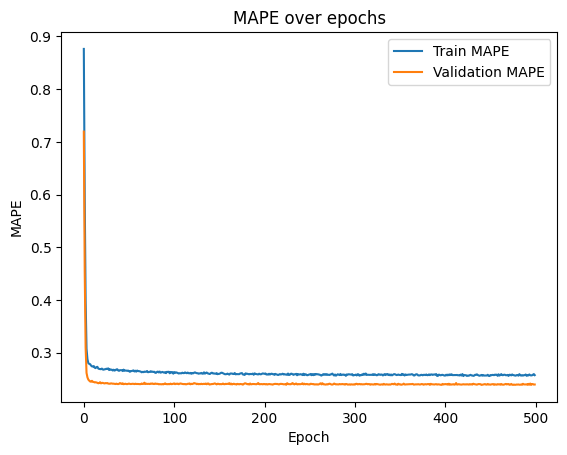

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

class MAPELoss(nn.Module):
    def __init__(self):
        super(MAPELoss, self).__init__()
    
    def forward(self, y_pred, y_true):
        # Добавляем небольшой эпсилон для предотвращения деления на ноль
        epsilon = 1e-7
        return torch.mean(torch.abs((y_true - y_pred) / (y_true + epsilon)))

# Преобразование данных в тензоры PyTorch
X_train_tensor = torch.tensor(X_train_final.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_lgbm.values, dtype=torch.float32).view(-1, 1)  # Добавляем .values
X_val_tensor = torch.tensor(X_test_final.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_test_lgbm.values, dtype=torch.float32).view(-1, 1)  # Добавляем .values

# Определение нейронной сети
class RegressionNN(nn.Module):
    def __init__(self, input_dim):
        super(RegressionNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),   # Входной слой, меньший размер
            nn.ReLU(),
            nn.Dropout(0.2),            # Dropout для предотвращения переобучения
            nn.Linear(64, 32),          # Второй слой с уменьшенным размером
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, 1)            # Выходной слой
        )

    def forward(self, x):
        return self.model(x)

# Инициализация модели
input_dim = X_train.shape[1]  # Количество признаков
NN = RegressionNN(input_dim)

# Оптимизатор и функция потерь
criterion = MAPELoss()  # Функция потерь для регрессии
optimizer = optim.Adam(NN.parameters(), lr=0.001, weight_decay=1e-5)  # Оптимизатор Adam

# Обучение модели
num_epochs = 500
batch_size = 64

def train_model(model, X_train, y_train, X_val, y_val, criterion, optimizer, num_epochs, batch_size):
    train_loss_history = []
    val_loss_history = []
    train_mape_history = []  # Добавление MAPE для тренировки
    val_mape_history = []    # Добавление MAPE для валидации

    for epoch in range(num_epochs):
        model.train()
        permutation = torch.randperm(X_train.size(0))  # Перемешиваем данные
        epoch_loss = 0  # Инициализация для потерь на эпоху
        epoch_mape = 0  # Инициализация для MAPE на эпоху

        # Процесс обучения на мини-батчах
        for i in range(0, X_train.size(0), batch_size):
            indices = permutation[i:i + batch_size]
            batch_X, batch_y = X_train[indices], y_train[indices]

            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()  # Добавляем потери текущего батча
            epoch_mape += mean_absolute_percentage_error(batch_y.detach().numpy(), outputs.detach().numpy())  # Считаем MAPE

        # Усреднение потерь и MAPE на эпоху
        train_loss_history.append(epoch_loss / (len(X_train) // batch_size))
        train_mape_history.append(epoch_mape / (len(X_train) // batch_size))  # Усреднение MAPE

        # Оценка на валидационной выборке
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val)
            val_loss_history.append(val_loss.item())

            # Подсчет MAPE для валидации
            val_mape = mean_absolute_percentage_error(y_val.detach().numpy(), val_outputs.detach().numpy())
            val_mape_history.append(val_mape)

        # Логирование потерь и MAPE каждые 50 эпох
        if (epoch + 1) % 50 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Train MAPE: {train_mape_history[-1]:.4f}, Val MAPE: {val_mape_history[-1]:.4f}")

    return train_loss_history, val_loss_history, train_mape_history, val_mape_history

# Обучаем модель
train_loss, val_loss, train_mape, val_mape = train_model(
    NN, X_train_tensor, y_train_tensor,
    X_val_tensor, y_val_tensor,
    criterion, optimizer, num_epochs, batch_size
)

# Построение графика обучения
import matplotlib.pyplot as plt
# Построение графика MAPE
plt.plot(train_mape, label='Train MAPE')
plt.plot(val_mape, label='Validation MAPE')
plt.legend()
plt.title('MAPE over epochs')
plt.xlabel('Epoch')
plt.ylabel('MAPE')
plt.show()

Epoch [50/600], Train MAPE: 0.143096, Val MAPE: 0.061435
Epoch [100/600], Train MAPE: 0.121430, Val MAPE: 0.053683
Epoch [150/600], Train MAPE: 0.111920, Val MAPE: 0.051291
Epoch [200/600], Train MAPE: 0.109371, Val MAPE: 0.051081
Epoch [250/600], Train MAPE: 0.104592, Val MAPE: 0.050438
Epoch [300/600], Train MAPE: 0.099702, Val MAPE: 0.049567
Epoch [350/600], Train MAPE: 0.098146, Val MAPE: 0.049333
Epoch [400/600], Train MAPE: 0.096010, Val MAPE: 0.049684
Epoch [450/600], Train MAPE: 0.093093, Val MAPE: 0.049128
Epoch [500/600], Train MAPE: 0.092472, Val MAPE: 0.049233
Epoch [550/600], Train MAPE: 0.090760, Val MAPE: 0.048686
Epoch [600/600], Train MAPE: 0.089722, Val MAPE: 0.048674


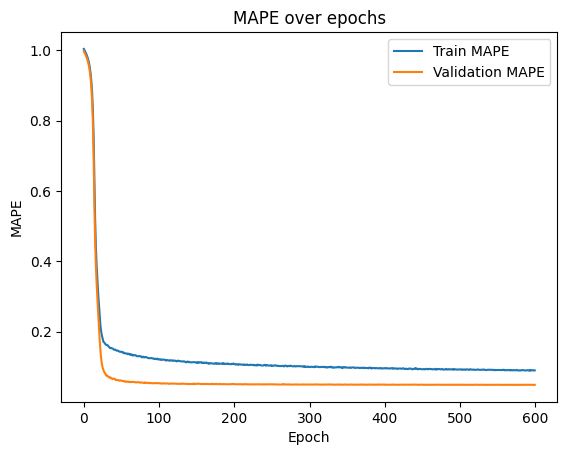

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

class MAPELoss(nn.Module):
    def __init__(self):
        super(MAPELoss, self).__init__()
    
    def forward(self, y_pred, y_true):
        # Добавляем небольшой эпсилон для предотвращения деления на ноль
        epsilon = 1e-7
        return torch.mean(torch.abs((y_true - y_pred) / (y_true + epsilon)))

# Преобразование данных в тензоры PyTorch
X_train_tensor = torch.tensor(X_train_final.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_catboost.values, dtype=torch.float32).view(-1, 1)  # Добавляем .values
X_val_tensor = torch.tensor(X_test_final.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_test_catboost.values, dtype=torch.float32).view(-1, 1)  # Добавляем .values

# Определение нейронной сети
class RegressionNN(nn.Module):
    def __init__(self, input_dim):
        super(RegressionNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),   # Входной слой, меньший размер
            nn.ReLU(),
            nn.Dropout(0.2),            # Dropout для предотвращения переобучения
            nn.Linear(64, 32),          # Второй слой с уменьшенным размером
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, 1)            # Выходной слой
        )

    def forward(self, x):
        return self.model(x)

# Инициализация модели
input_dim = X_train.shape[1]  # Количество признаков
NN_log = RegressionNN(input_dim)

# Оптимизатор и функция потерь
criterion = MAPELoss()  # Функция потерь для регрессии
optimizer =  optim.SGD(NN_log.parameters(), lr=0.001, momentum=0.9)

# Обучение модели
num_epochs = 600
batch_size = 64

def train_model(model, X_train, y_train, X_val, y_val, criterion, optimizer, num_epochs, batch_size):
    train_loss_history = []
    val_loss_history = []
    train_mape_history = []  # Добавление MAPE для тренировки
    val_mape_history = []    # Добавление MAPE для валидации

    for epoch in range(num_epochs):
        model.train()
        permutation = torch.randperm(X_train.size(0))  # Перемешиваем данные
        epoch_loss = 0  # Инициализация для потерь на эпоху
        epoch_mape = 0  # Инициализация для MAPE на эпоху

        # Процесс обучения на мини-батчах
        for i in range(0, X_train.size(0), batch_size):
            indices = permutation[i:i + batch_size]
            batch_X, batch_y = X_train[indices], y_train[indices]

            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()  # Добавляем потери текущего батча
            epoch_mape += mean_absolute_percentage_error(batch_y.detach().numpy(), outputs.detach().numpy())  # Считаем MAPE

        # Усреднение потерь и MAPE на эпоху
        train_loss_history.append(epoch_loss / (len(X_train) // batch_size))
        train_mape_history.append(epoch_mape / (len(X_train) // batch_size))  # Усреднение MAPE

        # Оценка на валидационной выборке
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val)
            val_loss_history.append(val_loss.item())

            # Подсчет MAPE для валидации
            val_mape = mean_absolute_percentage_error(y_val.detach().numpy(), val_outputs.detach().numpy())
            val_mape_history.append(val_mape)

        # Логирование потерь и MAPE каждые 50 эпох
        if (epoch + 1) % 50 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Train MAPE: {train_mape_history[-1]:.6f}, Val MAPE: {val_mape_history[-1]:.6f}")

    return train_loss_history, val_loss_history, train_mape_history, val_mape_history

# Обучаем модель
train_loss, val_loss, train_mape, val_mape = train_model(
    NN_log, X_train_tensor, y_train_tensor,
    X_val_tensor, y_val_tensor,
    criterion, optimizer, num_epochs, batch_size
)

# Построение графика обучения
import matplotlib.pyplot as plt
# Построение графика MAPE
plt.plot(train_mape, label='Train MAPE')
plt.plot(val_mape, label='Validation MAPE')
plt.legend()
plt.title('MAPE over epochs')
plt.xlabel('Epoch')
plt.ylabel('MAPE')
plt.show()

In [ ]:
import lightgbm as lgb
import xgboost as xgb
import catboost as cb
import pandas as pd
import numpy as np
from joblib import load
from deap import base, creator, tools, algorithms
import random
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import random
def update_predictions(xgboost_pred, nn_pred, nn2_pred):
    if xgboost_pred >= max(xgboost_pred, nn_pred):
        return xgboost_pred
    else:
        return (nn_pred + nn2_pred) / 2

X_train_tensor = torch.tensor(X_train_final.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_lgbm.values, dtype=torch.float32).view(-1, 1)  # Добавляем .values
X_val_tensor = torch.tensor(X_test_final.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_test_lgbm.values, dtype=torch.float32).view(-1, 1)  # Добавляем .
y_train_tensor_log = torch.tensor(y_train_catboost.values, dtype=torch.float32).view(-1, 1)  # Добавляем .values
y_val_tensor_log = torch.tensor(y_test_catboost.values, dtype=torch.float32).view(-1, 1)  # Добавляем .values

# Загрузка моделей
lgbm_model = lgb.Booster(model_file=r'C:\Users\Sultan\Desktop\mipt_competition\models\lightgbm_model_mipt.txt')
xgb_model = xgb.Booster()
xgb_model.load_model(r'C:\Users\Sultan\Desktop\mipt_competition\models\xgboost_model_mipt.model')
catboost_model = cb.CatBoostRegressor()
catboost_model.load_model(r'C:\Users\Sultan\Desktop\mipt_competition\models\catboost_model_mipt.cbm')

# Генерация предсказаний для тренировочных данных
lgbm_preds_train = lgbm_model.predict(X_train_final)
xgb_preds_train = xgb_model.predict(xgb.DMatrix(X_train_final))
catboost_preds_train = 1.2 ** (np.array(catboost_model.predict(X_train_final)))
NN.eval()
with torch.no_grad():
    predictions = NN(X_train_tensor)
    nn_preds_train = predictions.numpy().flatten()
NN_log.eval()
with torch.no_grad():
    predictions = NN_log(X_train_tensor)
    nn_preds_log_train = 1.2 ** (np.array(predictions.numpy().flatten()))
# Создание DataFrame с предсказаниями на тренировочных данных
train_predictions = pd.DataFrame({
    'LGBM_Predictions': lgbm_preds_train,
    'XGBoost_Predictions': xgb_preds_train,
    'CatBoost_Predictions': catboost_preds_train,
    'NN_Predictions' : nn_preds_train,
    'NN_log_Predictions' : nn_preds_log_train,
})
# Генерация предсказаний для тестовых данных
lgbm_preds_test = lgbm_model.predict(X_test_final)
xgb_preds_test = xgb_model.predict(xgb.DMatrix(X_test_final))
catboost_preds_test = 1.2 ** (np.array(catboost_model.predict(X_test_final)))
with torch.no_grad():
    predictions = NN(X_val_tensor)
    nn_preds_test = predictions.numpy().flatten()
with torch.no_grad():
    predictions = NN_log(X_val_tensor)
    nn_preds_log_test = 1.2 ** (np.array(predictions.numpy().flatten()))
# Создание DataFrame с предсказаниями на тестовых данных
test_predictions = pd.DataFrame({
    'LGBM_Predictions': lgbm_preds_test,
    'XGBoost_Predictions': xgb_preds_test,
    'CatBoost_Predictions': catboost_preds_test,
    'NN_Predictions' : nn_preds_test,
    'NN_log_Predictions' : nn_preds_log_test,
})
if MODE == 'test':
    optimal_weights = pd.read_csv(r'C:\Users\Sultan\Desktop\mipt_competition\tmp_data\weights.csv')
    final_predictions = np.dot(test_predictions.values, optimal_weights)
else:
    # Создание класса для оптимизации
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))  # Минимизируем ошибку
    creator.create("Individual", list, fitness=creator.FitnessMin)

    # Функция для расчета ошибки
    def evaluate(individual):
        final_predictions = np.dot(test_predictions.values, individual)
        return mean_absolute_percentage_error(y_test, final_predictions),

    # Создание популяции
    toolbox = base.Toolbox()
    toolbox.register("attr_float", random.uniform, 0, 1)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=len(train_predictions.columns))
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("mate", tools.cxBlend, alpha=0.5)
    toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)
    toolbox.register("evaluate", evaluate)

    # Генерация начальной популяции
    population = toolbox.population(n=100)

    # Эволюция
    algorithms.eaSimple(population, toolbox, cxpb=0.35, mutpb=0.25, ngen=60, verbose=True)

    # Получение лучших весов
    best_individual = tools.selBest(population, 1)[0]
    optimal_weights = best_individual
    pd.DataFrame({'weights': optimal_weights}).to_csv(r'C:\Users\Sultan\Desktop\mipt_competition\tmp_data\weights.csv',index=False)
    print("Оптимальные веса:", optimal_weights)
    final_predictions = np.dot(test_predictions.values, optimal_weights)
    print(mean_absolute_percentage_error(y_test_lgbm,final_predictions))



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

torch.manual_seed(42)
# Определение функции MAPE Loss
class MAPELoss(nn.Module):
    def __init__(self):
        super(MAPELoss, self).__init__()
    
    def forward(self, y_pred, y_true):
        # Добавляем небольшой эпсилон для предотвращения деления на ноль
        epsilon = 1e-7
        return torch.mean(torch.abs((y_true - y_pred) / (y_true + epsilon)))

# Преобразование данных в тензоры PyTorch
train_predictions_ = torch.tensor(train_predictions.values, dtype=torch.float32)
y_train_lgbm_ = torch.tensor(y_train_lgbm.values, dtype=torch.float32).view(-1, 1)
test_predictions_ = torch.tensor(test_predictions.values, dtype=torch.float32)
y_test_true = torch.tensor(y_test_lgbm.values, dtype=torch.float32).view(-1, 1)

class ImprovedRegressionModel(nn.Module):
    def __init__(self):
        super(ImprovedRegressionModel, self).__init__()
        self.fc1 = nn.Linear(5, 100)
        self.fc2 = nn.Linear(100, 36)
        self.fc3 = nn.Linear(36, 1)
        self.dropout = nn.Dropout(0.2)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

model = ImprovedRegressionModel()

# Пример использования разных оптимизаторов
optimizers = {
    'Momentum': optim.SGD(model.parameters(), lr=0.001, momentum=0.9),
    'RMSprop': optim.RMSprop(model.parameters(), lr=0.001),
    'Adagrad': optim.Adagrad(model.parameters(), lr=0.001),
    'Adadelta': optim.Adadelta(model.parameters(), lr=1.0),
    'Adam': optim.Adam(model.parameters(), lr=0.001),
    'Nadam': optim.NAdam(model.parameters(), lr=0.001),
    'AdamW': optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.001),
    'Rprop': optim.Rprop(model.parameters(), lr=0.01),
    'ASGD': optim.ASGD(model.parameters(), lr=0.001),
    'LBFGS': optim.LBFGS(model.parameters(), lr=0.001),
    'Adamax': optim.Adamax(model.parameters(), lr=0.001),
    'RMSprop_with_momentum': optim.RMSprop(model.parameters(), lr=0.001, momentum=0.9),
    'SGD_with_nesterov': optim.SGD(model.parameters(), lr=0.01, momentum=0.9, nesterov=True),
    'Adagrad_with_weight_decay': optim.Adagrad(model.parameters(), lr=0.001, weight_decay=0.01),
    'Adadelta_with_weight_decay': optim.Adadelta(model.parameters(), lr=1.0, weight_decay=0.01),
    'Adam_with_weight_decay': optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01),
    'Nadam_with_weight_decay': optim.NAdam(model.parameters(), lr=0.001, weight_decay=0.01),
    'Adamax_with_weight_decay': optim.Adamax(model.parameters(), lr=0.001, weight_decay=0.01),
    'Rprop_with_step_sizes': optim.Rprop(model.parameters(), lr=0.01, etas=(0.5, 1.2), step_sizes=(1e-6, 50)),
    'ASGD_with_lambdas': optim.ASGD(model.parameters(), lr=0.01, lambd=0.0001, alpha=0.75, t0=1000000.0, weight_decay=0.01)
}

# Функция для обучения и оценки модели
def train_and_evaluate(optimizer, X_train, y_train, X_test, y_test, epochs=100, batch_size=64):
    criterion = MAPELoss()
    optimizer = optimizer
    model.train()
    
    # Обучение модели
    for epoch in range(epochs):
        def closure():
            optimizer.zero_grad()
            outputs = model(X_train)
            loss = criterion(outputs, y_train)
            loss.backward()
            return loss
        
        if isinstance(optimizer, optim.LBFGS):
            optimizer.step(closure)
        else:
            loss = closure()
            optimizer.step()
    
    # Оценка на тестовых данных
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)
    
    print(f"Среднеквадратическая ошибка (MSE): {mse}")
    print(f"Средняя абсолютная процентная ошибка (MAPE): {mape}%")

# Компиляция и обучение модели для каждого оптимизатора
for name, optimizer in optimizers.items():
    print(f"Модель с оптимизатором {name}:")
    train_and_evaluate(optimizer, train_predictions_, y_train_lgbm_, test_predictions_, y_test_true)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

torch.manual_seed(42)
# Определение функции MAPE Loss
class MAPELoss(nn.Module):
    def __init__(self):
        super(MAPELoss, self).__init__()
    
    def forward(self, y_pred, y_true):
        # Добавляем небольшой эпсилон для предотвращения деления на ноль
        epsilon = 1e-7
        return torch.mean(torch.abs((y_true - y_pred) / (y_true + epsilon)))

# Преобразование данных в тензоры PyTorch
train_predictions_ = torch.tensor(train_predictions.values, dtype=torch.float32)
y_train_lgbm_ = torch.tensor(y_train_lgbm.values, dtype=torch.float32).view(-1, 1)
test_predictions_ = torch.tensor(test_predictions.values, dtype=torch.float32)

class ImprovedRegressionModel(nn.Module):
    def __init__(self):
        super(ImprovedRegressionModel, self).__init__()
        self.fc1 = nn.Linear(5, 100)
        self.fc2 = nn.Linear(100, 36)
        self.fc3 = nn.Linear(36, 1)
        self.dropout = nn.Dropout(0.2)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

model = ImprovedRegressionModel()

def train_and_evaluate(X_train, y_train, epochs=100, batch_size=64):
    criterion = MAPELoss()
    optimizer = optim.Adamax(model.parameters(), lr=0.001, weight_decay=0.01)
    model.train()
    
    # Обучение модели
    for epoch in range(epochs):
        def closure():
            optimizer.zero_grad()
            outputs = model(X_train)
            loss = criterion(outputs, y_train)
            loss.backward()
            return loss
        
        if isinstance(optimizer, optim.LBFGS):
            optimizer.step(closure)
        else:
            loss = closure()
            optimizer.step()
train_and_evaluate(train_predictions_,y_train_lgbm_)
model.eval()
with torch.no_grad():
    y_pred = model(test_predictions_)
    nn_preds_final = y_pred.numpy().flatten()



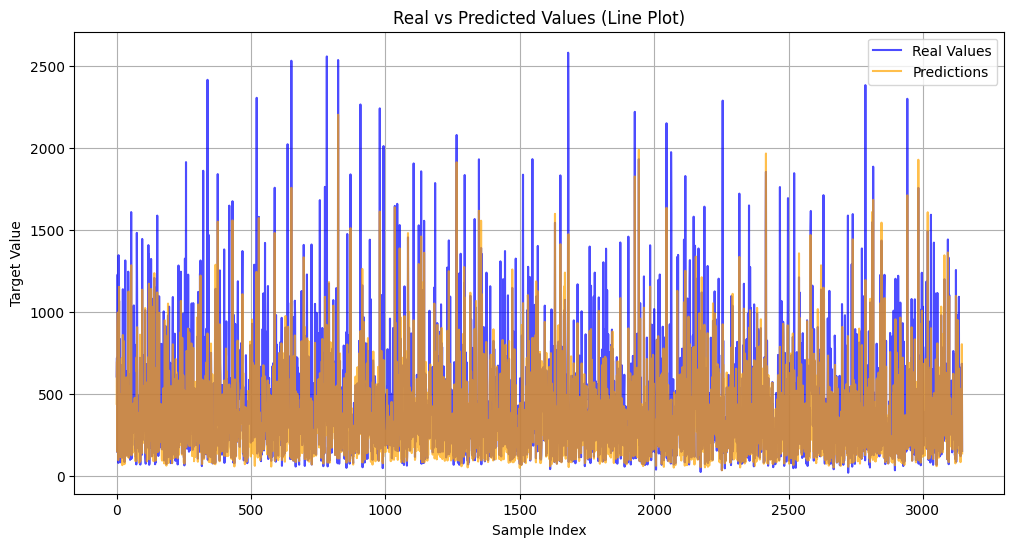

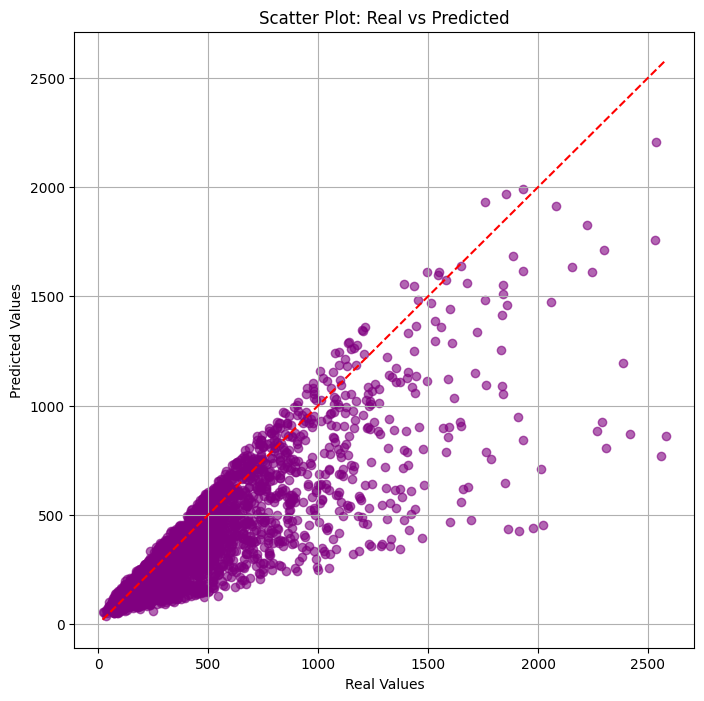

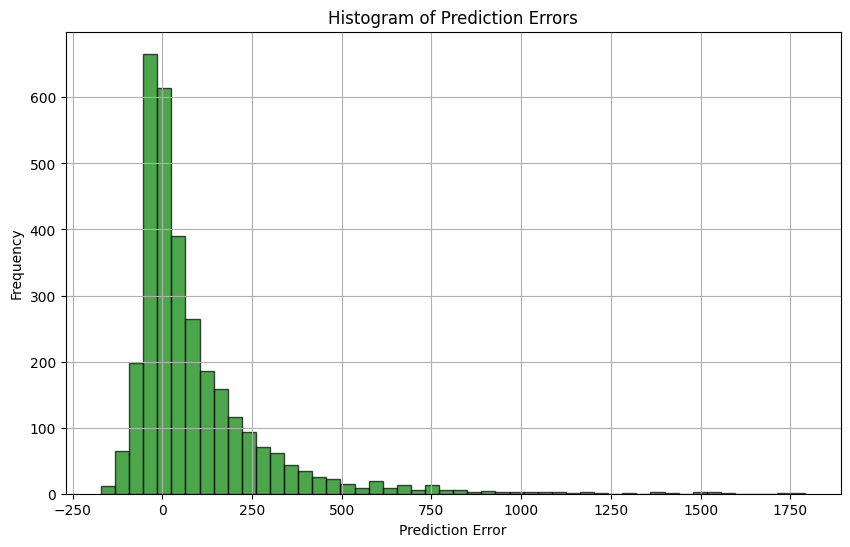

In [ ]:
# Построение графиков
import matplotlib.pyplot as plt

# Линейный график
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Real Values", color="blue", alpha=0.7)
plt.plot(final_predictions, label="Predictions", color="orange", alpha=0.7)
plt.title("Real vs Predicted Values (Line Plot)")
plt.xlabel("Sample Index")
plt.ylabel("Target Value")
plt.legend()
plt.grid()
plt.show()

# Диаграмма рассеяния
plt.figure(figsize=(8, 8))
plt.scatter(y_test.values, final_predictions, alpha=0.6, color="purple")
plt.title("Scatter Plot: Real vs Predicted")
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.grid()
plt.show()

# Гистограмма ошибок
errors = y_test.values - final_predictions
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50, color="green", alpha=0.7, edgecolor="black")
plt.title("Histogram of Prediction Errors")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.grid()
plt.show()


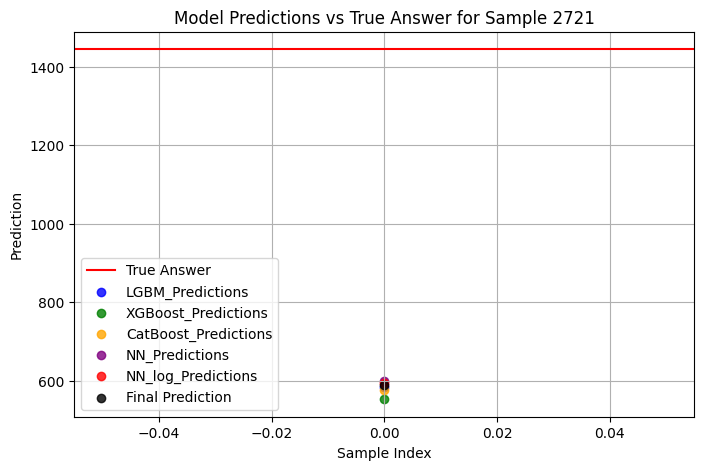

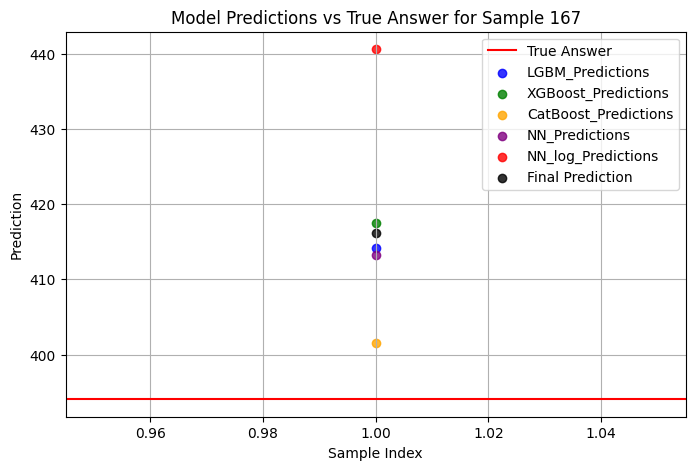

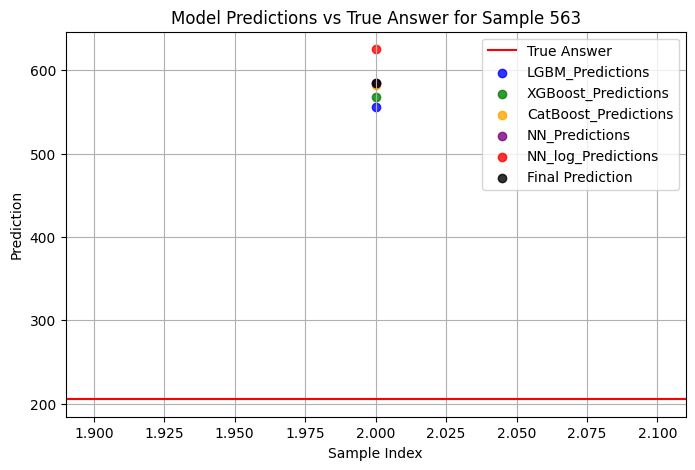

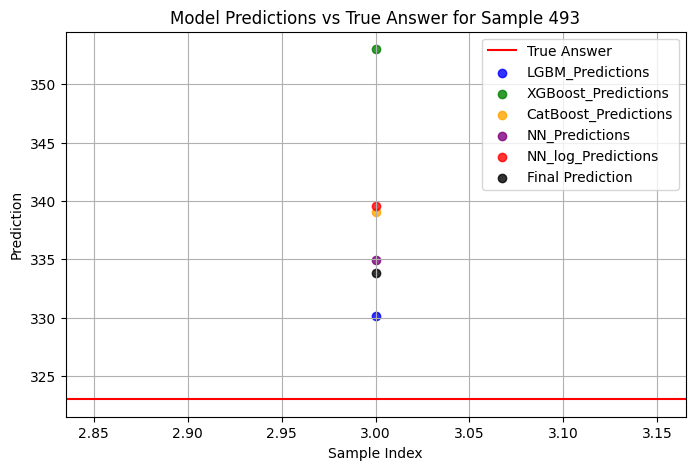

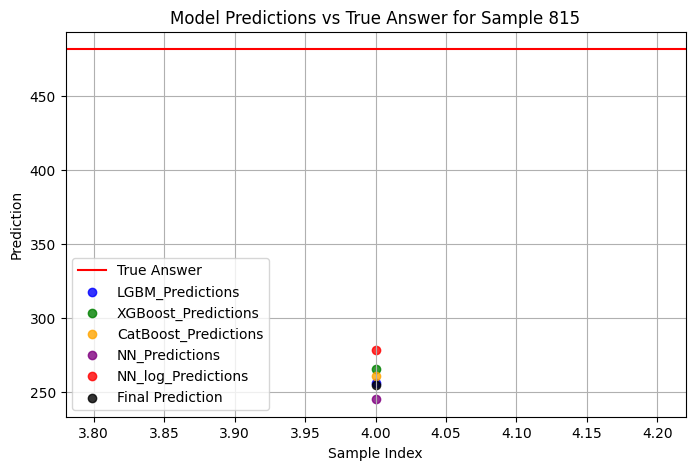

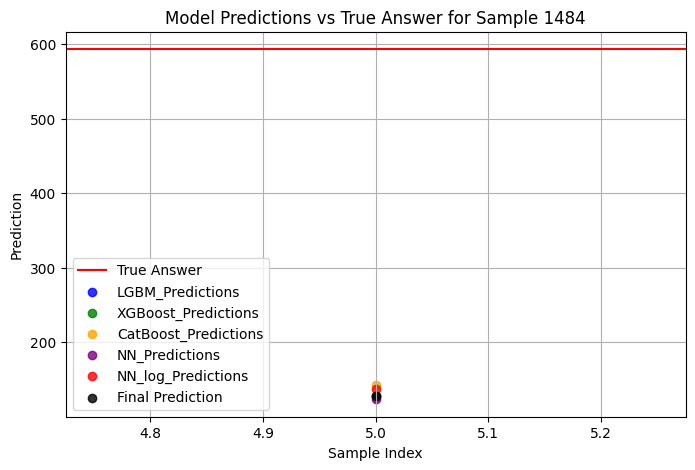

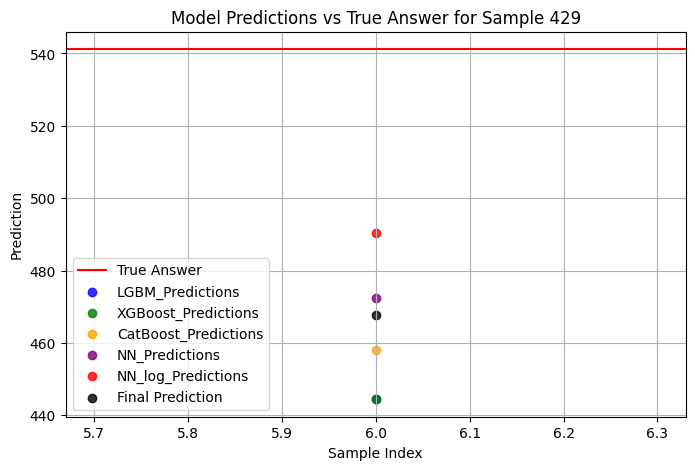

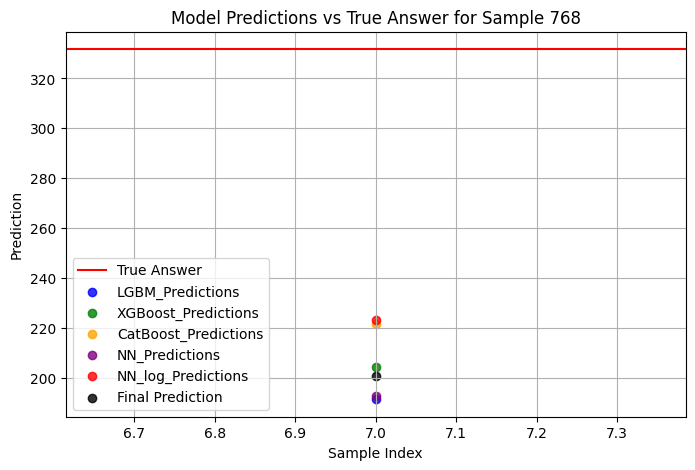

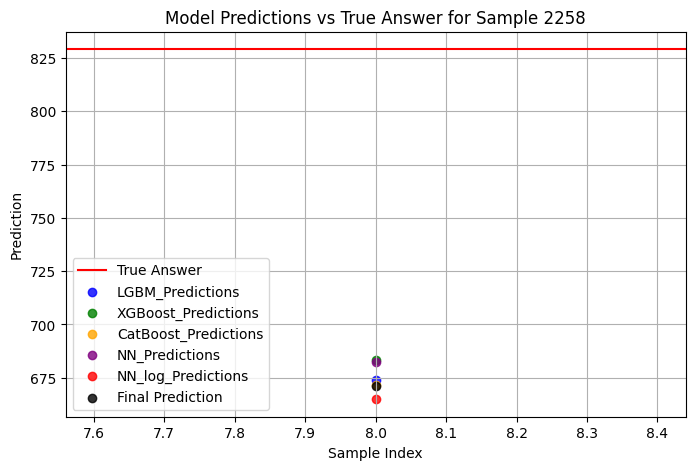

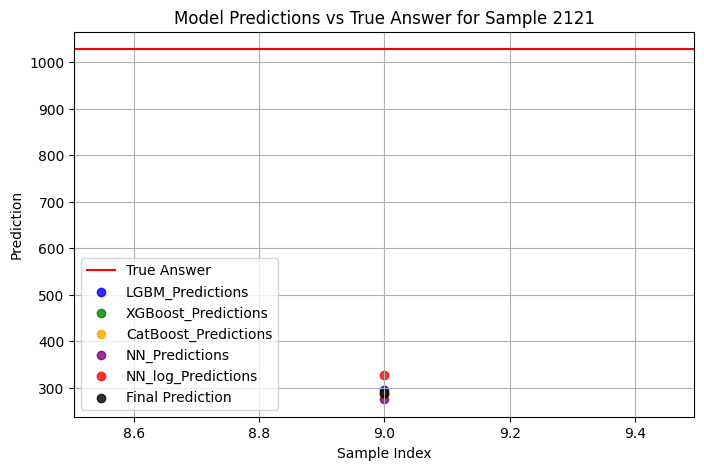

In [ ]:
from joblib import load
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np

# Создание DataFrame для результатов (тестовая выборка)
test_results = test_predictions
# Предполагаем, что у нас есть верные ответы для тестовой выборки (взяты из train.csv)
y_test_true = np.array(y_train)  # Это нужно, чтобы использовать истинные значения

# Выбор случайных 10 примеров
random_indices = random.sample(range(len(test_results)), 3)
test_results_subsampled = test_results.iloc[random_indices]
y_test_true_subsampled = y_test_true[random_indices]

# Предсказание итогового значения с использованием оптимальных весов
final_predictions = np.dot(test_results.values, optimal_weights)  # Итоговое предсказание
final_predictions_subsampled = final_predictions[random_indices]

# Построение графиков для каждого примера в подвыборке
for i, idx in enumerate(random_indices):
    plt.figure(figsize=(8, 5))
    
    # Горизонтальная прямая для верного ответа
    plt.axhline(y=y_test_true_subsampled[i], color='r', linestyle='-', label='True Answer')
    
    # Точки для предсказаний каждой модели
    for model, color in zip(test_results.columns, ['blue', 'green', 'orange', 'purple','red']):
        plt.scatter([i], [test_results_subsampled.loc[idx, model]], label=model, color=color, alpha=0.8)
    
    # Точка для итогового предсказания
    plt.scatter([i], [final_predictions_subsampled[i]], label='Final Prediction', color='black', alpha=0.8)
    
    # Настройка графика
    plt.title(f'Model Predictions vs True Answer for Sample {idx + 1}')
    plt.xlabel('Sample Index')
    plt.ylabel('Prediction')
    plt.legend()
    plt.grid(True)
    plt.show()


In [396]:
X_test = pd.read_csv('test.csv')

In [ ]:
submission = pd.DataFrame({
    'index': X_test['index'],
    'y': final_predictions.flatten()
})
submission.to_csv(r'C:\Users\Sultan\Desktop\ml\ml_projects\subs\submission_mipt.csv', index=False)

In [408]:
submission

,index,y
0,0,623.619748
1,1,177.498995
2,2,642.272990
3,3,1364.275798
4,4,1185.476155
...,...,...
995,995,165.395120
996,996,286.438601
997,997,291.530952
998,998,298.073244


In [ ]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   1000 non-null   int64  
 1   y       1000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 15.8 KB
